
# WhatsApp Chat Analysis

## Introduction

In today's digital age, messaging platforms like WhatsApp have revolutionized the way we communicate. WhatsApp groups, in particular, serve as hubs for conversations among friends, family, and colleagues, creating a treasure trove of textual data. This project is dedicated to the exploration and analysis of WhatsApp chat data.

Chat data analysis encompasses various aspects, including understanding the dynamics of group interactions, identifying popular topics, and gaining insights into communication patterns. Our project dives into this realm by focusing on WhatsApp chat conversations, with the aim of uncovering valuable insights, such as:

-   Understanding the trends and topics that dominate WhatsApp group conversations.
-   Identifying patterns and key events within the chat data.
-   Visualizing chat activity over time.
-   Analyzing the frequency of messages, media sharing, and more.

To achieve these objectives, we will leverage Python, along with data manipulation libraries and techniques. Additionally, we will use data visualization tools to present our findings clearly and effectively.

### Project Goals

1.  **Data Collection**: Extract and preprocess WhatsApp chat data, ensuring it's ready for analysis.
    
2.  **Chat Analysis**: Perform comprehensive analysis, including message frequency, user interactions, and content trends.
    
3.  **Visualization**: Create informative visualizations to represent chat activity, trends, and patterns effectively.
    
4.  **Insight Generation**: Draw meaningful insights from the chat data analysis results and provide actionable recommendations or conclusions based on these insights.
    
5.  **Pythonic Code**: Throughout the project, we will follow Python best practices and coding guidelines (PEP-8) to ensure clean, optimized, and maintainable code.


**Before starting with the task of WhatsApp Chat analysis with Python**, you need to extract your WhatsApp data from your smartphone, which is a straightforward process. Follow these steps to export your WhatsApp chats:

1.  If you are using an iPhone:
    
    -   Open the chat with the person or group you want to export.
    -   Tap on the Contact Name or the Group Name at the top of the chat.
    -   Scroll to the bottom and tap on "Export Chat."
2.  If you are using an Android smartphone:
    
    -   Open the chat with the person or group you want to export.
    -   Tap on the three dots (menu) located at the top right corner of the chat.
    -   Select "More" or "Options."
    -   Tap on "Export Chat."
3.  Regardless of your smartphone type, you'll be prompted to choose whether you want to export the chat with or without media (images, videos, etc.). For simplicity in your analysis, you can choose "without media."
    
4.  After making your selection, you'll have the option to email this chat to yourself. Enter your email address and send the chat.
    
5.  Access your email from your computer, open the email containing the exported chat, and download it to your system.
    

Now that you have successfully exported your WhatsApp chat, you can proceed with WhatsApp chat analysis using Python. In the following sections, we will guide you through the steps of analyzing WhatsApp chat data with Python.

Let's Start

#### Import all necessary libraries

In [79]:
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt

# Data visualization (based on matplotlib)
import seaborn as sns

# For regular expressions
import regex

# Word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# For text preprocessing
import re

# For mathematical operations
import numpy as np

# For counting most common words in a list of strings
from collections import Counter

# Show every column in dataframe
pd.set_option("display.max_columns", None)

# pip install emoji

In [80]:
# Define the file path to your WhatsApp chat Excel file
chat_excel_file_path = "../Sentiment_Analysis/dataset/1_Dec_Chat.xlsx"

# Read the WhatsApp chat data from the Excel file into a DataFrame
# index_col=0 means that the first column is the index column
chat_data = pd.read_excel(chat_excel_file_path, index_col=0)

# Display the first 5 rows of the chat data
first_five_rows = chat_data.head(5)

# Print the first five rows to view the data
first_five_rows


,time,sender name,sender message,Column3,Column4
date,,,,,
2022-09-29,7:04:00 PM,Manish Accenture created group Accenture 22 J...,NaN,NaN,NaN
2022-09-29,7:08:00 PM,You joined using this group's invite link,NaN,NaN,NaN
2022-09-29,7:08:00 PM,Manish Accenture,Aapki 19sept ki joining the ?,NaN,NaN
2022-09-29,7:08:00 PM,Harshit Accenture joined using this group's i...,NaN,NaN,NaN
2022-09-29,7:09:00 PM,Chiraggg,Kiski?,NaN,NaN


In [81]:
# Let's copy our data into a new DataFrame so we don't modify the original data
df = chat_data.copy()

As we have successfully imported the data into a data frame, we can now proceed with the next step of the analysis. We will start by cleaning the data and preparing it for analysis.

Let's first merge the 3 message columns into a single column. 

As we have 2 columns, while  merging them, we are getting NaN values in the merged column. So, we will replace the NaN values with empty strings.

In [82]:
# Replace NaN values with empty strings in columns 'sender message', 'Column3', and 'Column4'
df["sender message"].fillna("", inplace=True)
df["Column3"].fillna("", inplace=True)
df["Column4"].fillna("", inplace=True)

# Merge sender message, Column3, and Column4 columns into a single column named Message
df["Message"] = (
    df["sender message"]
    + " "
    + df["Column3"].astype(str)
    + " "
    + df["Column4"].astype(str)
)

# Drop the sender message, Column3, and Column4 columns
df.drop(columns=["sender message", "Column3", "Column4"], inplace=True)

In [83]:
# Display the first 5 rows of the chat data
df.head(5)


,time,sender name,Message
date,,,
2022-09-29,7:04:00 PM,Manish Accenture created group Accenture 22 J...,
2022-09-29,7:08:00 PM,You joined using this group's invite link,
2022-09-29,7:08:00 PM,Manish Accenture,Aapki 19sept ki joining the ?
2022-09-29,7:08:00 PM,Harshit Accenture joined using this group's i...,
2022-09-29,7:09:00 PM,Chiraggg,Kiski?


#### Data Cleaning

As we have successfully merged the 3 message columns into a single column, we can now proceed with the next step of the analysis. We will start by cleaning the data and preparing it for analysis.


In [84]:
# Reset the index of the DataFrame
df.reset_index(inplace=True)

# Rename the index column to "date"
df.rename(columns={"date": "date"}, inplace=True)

# Display the first five rows of the DataFrame
df


,date,time,sender name,Message
0,2022-09-29,7:04:00 PM,Manish Accenture created group Accenture 22 J...,
1,2022-09-29,7:08:00 PM,You joined using this group's invite link,
2,2022-09-29,7:08:00 PM,Manish Accenture,Aapki 19sept ki joining the ?
3,2022-09-29,7:08:00 PM,Harshit Accenture joined using this group's i...,
4,2022-09-29,7:09:00 PM,Chiraggg,Kiski?
...,...,...,...,...
2237,2023-03-30,2:02:00 AM,Disappearing messages now support keeping mes...,
2238,2023-04-28,12:11:00 AM,~ Satya left,
2239,2023-06-03,10:57:00 PM,~ Prity Singh left,
2240,2023-08-05,6:55:00 PM,+91 96182 81233 changed their phone number to...,


In [85]:
# Let's remove the rows that contains NaT values in the Date column, NaN values in the sender name column, and empty strings in the Message column
df.dropna(subset=["date", "sender name", "Message"], inplace=True)
df.head(220)

,date,time,sender name,Message
0,2022-09-29,7:04:00 PM,Manish Accenture created group Accenture 22 J...,
1,2022-09-29,7:08:00 PM,You joined using this group's invite link,
2,2022-09-29,7:08:00 PM,Manish Accenture,Aapki 19sept ki joining the ?
3,2022-09-29,7:08:00 PM,Harshit Accenture joined using this group's i...,
4,2022-09-29,7:09:00 PM,Chiraggg,Kiski?
...,...,...,...,...
215,2022-10-14,9:11:00 PM,Harshit Accenture,Baaki sab ko bhi aaya h?
216,2022-10-14,9:12:00 PM,+91 95049 43695,Ha
217,2022-10-15,9:20:00 AM,Manish Accenture,👋.....
219,2022-10-15,7:27:00 PM,Dilip Accenture joined using this group's inv...,


#### EDA

##### Total Messages Sent by Each User

In [86]:
# Let's see total messages sent
total_messages = df.shape[0]
print("Total messages sent:", total_messages)


Total messages sent: 2134


##### Total Media Messages Sent by Each User

In [87]:
# Count the number of media messages by checking if 'Message' contains '<Media omitted>'
num_media_messages = df[df["Message"].str.contains("<Media omitted>")].shape[0]
num_media_messages


88

##### Total User's joined and left the group

In [88]:
# Count the number of times someone joined the group using the invite link
join_message_count = df[df["sender name"].str.contains(
    " joined using this group's invite link")].shape[0]

# Count the number of times someone left the group
leave_message_count = df[df["sender name"].str.contains(" left")].shape[0]

# Print the counts
print("Total join messages:", join_message_count)
print("Total leave messages:", leave_message_count)

Total join messages: 73
Total leave messages: 18


In [89]:
# Function to extract emojis from a text message
def extract_emojis(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile(
        r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF"
        r"\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF"
        r"\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF"
        r"\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF"
        r"\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF]+",
        flags=re.UNICODE,
    )
    emojis = emoji_pattern.findall(text)
    return emojis


# Apply the extract_emojis function to the 'Message' column and create a new column 'Emojis'
df["Emojis"] = df["Message"].apply(extract_emojis)

# Count the total number of emojis
total_emojis = sum(df["Emojis"].str.len())

# Print the total number of emojis
print(total_emojis)


172


In [98]:
# Function to extract emojis from a text message
def extract_emojis(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile(
        r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF"
        r"\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF"
        r"\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF"
        r"\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF"
        r"\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF]+",
        flags=re.UNICODE,
    )
    emojis = emoji_pattern.findall(text)
    return emojis


# Apply the extract_emojis function to the 'Message' column and create a new column 'Emojis'
df["Emojis"] = df["Message"].apply(extract_emojis)

# Count the total number of emojis
emojis = sum(df["Emojis"].str.len())

# Count the frequency of each emoji
emoji_counts = Counter([emoji for sublist in df["Emojis"] for emoji in sublist])

# Get the top 10 emojis
top_10_emojis = emoji_counts.most_common(10)

# Create a DataFrame to display the top 10 emojis and their frequencies
top_10_df = pd.DataFrame(top_10_emojis, columns=["Emoji", "Frequency"])

# Set the index to start from 1
top_10_df.index = range(1, len(top_10_df) + 1)

# Display the DataFrame
top_10_df

,Emoji,Frequency
1,😂,30
2,🤣,14
3,😂😂,14
4,🙂🙂,9
5,😶,7
6,🙂,7
7,🥲,5
8,🏻,4
9,😂😂😂,4
10,😅,3


In [91]:
URLPATTERN = r"(https://\S+)"
df["urlcount"] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

links

0

In the dataset, it's worth noting that certain messages containing links appear to have been consolidated into a single entity labeled as `<Media omitted>` by WhatsApp. 

#### Let's display a word cloud of most common words

There are 55534 words in all the messages.


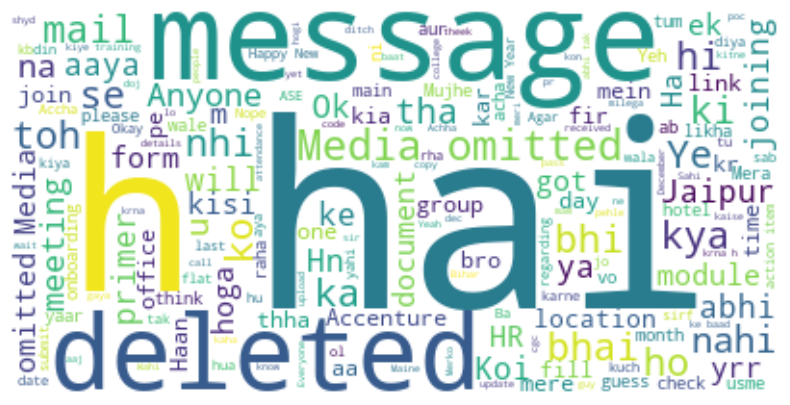

In [92]:
# Join all messages into a single text
text = " ".join(message for message in df["Message"])

# Calculate the total number of words in all the messages
total_words = len(text)
print("There are {} words in all the messages.".format(total_words))

# Define stopwords
stopwords = set(STOPWORDS)

# Generate a WordCloud image
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)

# Display the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [93]:
# Count the number of deleted messages using a regex pattern
deleted_messages_count = df[df["Message"].str.contains(
    r'^\s*This message was deleted\s*$', case=False, regex=True)].shape[0]

# Print the count of deleted messages
print("Total deleted messages:", deleted_messages_count)

Total deleted messages: 88


WhatsApp chat data can be a rich source of insights and analysis. Here are some additional analyses and insights you can derive from the data you've provided:

Message Count Over Time: Visualize how the number of messages in the group chat has changed over time. You can create a time series plot to see if there are any spikes in activity.

Word Frequency Analysis: Analyze the most frequently used words or phrases in the chat. This can provide insights into common topics of discussion.

Media Analysis: Count and analyze the types of media shared in the group, such as images, videos, and documents. You can also check if there are any patterns in the timing of media sharing.

Emoji Analysis: Analyze emoji usage in the chat. You can count the most frequently used emojis and create visualizations like an emoji word cloud.

Sentiment Analysis: Apply sentiment analysis to the messages to determine the overall sentiment of the chat over time. This can help identify periods of positivity, negativity, or neutrality.

Active Users: Identify the most active users in the group chat by counting the number of messages sent by each participant.

Message Length Analysis: Analyze the distribution of message lengths to see if there are any trends in message length over time.

Keyword Search: Conduct keyword searches to find specific topics or keywords discussed in the chat.

User Engagement: Calculate user engagement metrics, such as the number of messages sent per user or the average response time between messages.

Day and Time Analysis: Determine the days and times when the group chat is most active. This can help in scheduling important announcements or discussions.

User Interaction Networks: Create a network analysis to visualize how users interact with each other by mentioning or replying to each other's messages.

Topic Modeling: Use natural language processing techniques to perform topic modeling and identify common themes or topics of discussion within the chat.

In [102]:
# Create a WordCloud for the top 10 emojis if there are any emojis
if top_10_emojis:
    top_10_emoji_text = ' '.join([emoji[0] for emoji in top_10_emojis])

    # Check if the top_10_emoji_text is not empty
    if top_10_emoji_text:
        # Generate a WordCloud image for the top 10 emojis
        wordcloud = WordCloud(background_color="white").generate(top_10_emoji_text)

        # Display the WordCloud image
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print("No emoji text found in the top 10.")
else:
    print("No emojis found in the top 10.")


ValueError: We need at least 1 word to plot a word cloud, got 0.